In [2]:
import scipy.io
import numpy as np

In [3]:
import scipy.io as spio

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, spio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [86]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'p_431', 'p_435', 'p_436', 'p_441'])

In [95]:
mat["p_431"]["character_each_clip"].shape

(150, 4)

In [4]:
mat_reverse = loadmat('/media/yipeng/data/movie_2021/Movie_Analysis/final_result_outputs_reverse/LSTM/figure4a.mat')
mat_fake = loadmat('/media/yipeng/data/movie_2021/Movie_Analysis/final_result_outputs_fake_label/LSTM/figure4a.mat')
mat_old = loadmat('/media/yipeng/data/movie_2021/Movie_Analysis/final_result_outputs_old_feb/LSTM/figure4a.mat')
patient_names = ['p_431', 'p_435', 'p_436', 'p_441']

In [5]:
def extract_activation_each_patient(data, mode= "start"):
    res = []
    folds = ['fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_4']
    for f in folds:
        res.append(data[f][mode])
    res = np.array(res)
    res_mean = np.mean(res, 0)
    return res_mean

In [6]:
import matplotlib.pyplot as plt
def check_activations(mat):
    res = []
    for p in patient_names:
        activation = mat[p]["kfold_prediction_4sec"]
        activation_p = extract_activation_each_patient(activation)
        character = mat[p]["character_each_clip"]
        plt.figure()
        fig, axs = plt.subplots(4, 2, figsize= (4,10))
        for i in range(4):
            in_clip = np.where(character[:, i] == 1)[0]
            out_clip = np.where(character[:, i] == 0)[0]
            activation_inclip = activation_p[in_clip, i, 15:]
            activation_outclip = activation_p[out_clip, i, 15:]
            r = np.mean(activation_inclip)
            res.append(r)
            ax1 = axs[i, 0].imshow(activation_inclip, interpolation='nearest', aspect='auto')
            ax2 = axs[i, 1].imshow(activation_outclip,  interpolation='nearest', aspect='auto')
            ax1.set_clim(vmin=0, vmax=1)
            ax2.set_clim(vmin=0, vmax=1)
        #plt.savefig("/media/yipeng/data/movie_2021/Movie_Analysis/check_activations/reverse/" + p+".png")
    res = np.array(res)
    return res

In [7]:
res_old = check_activations(mat_old)
res_reverse = check_activations(mat_fake)

In [8]:
a = (res_old - res_reverse)/ res_reverse

In [9]:
a

array([-0.49545249, -0.63227108, -0.91429966, -0.39807641,  0.47895634,
        1.35405528,  0.04676435,  3.71780877, -0.45391461,  1.60409033,
        0.62354511,  6.74150355,  0.07917002, -0.51499252, -0.45941831,
        0.03088712])

In [10]:
a.mean()

0.6755222358912047

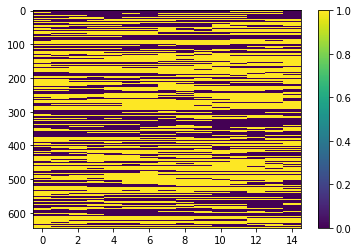

In [181]:
plt.imshow(a > 0,interpolation='nearest', aspect='auto')
plt.colorbar()

In [183]:
np.mean(a>0)

0.5330232558139535

<Figure size 432x288 with 0 Axes>

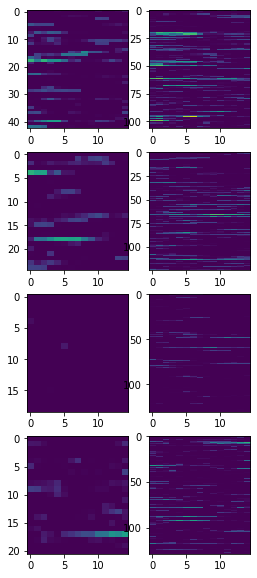

<Figure size 432x288 with 0 Axes>

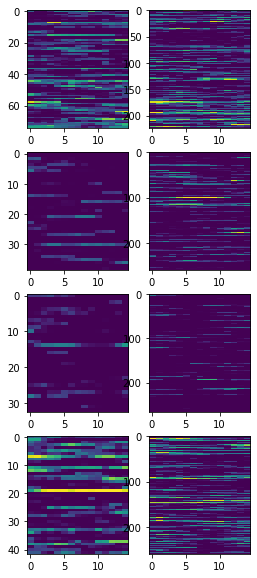

<Figure size 432x288 with 0 Axes>

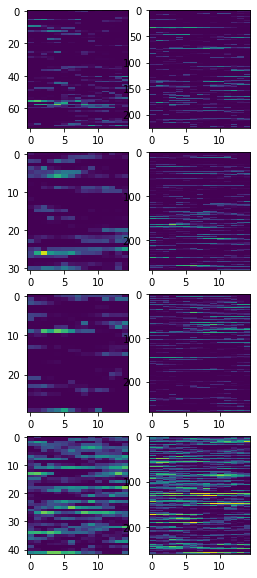

<Figure size 432x288 with 0 Axes>

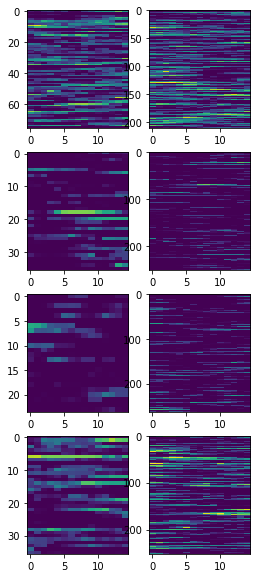

In [138]:
for p in patient_names:
    activation = mat[p]["kfold_prediction_4sec"]
    activation_p = extract_activation_each_patient(activation, "end")
    character = mat[p]["character_each_clip"]
    plt.figure()
    fig, axs = plt.subplots(4, 2, figsize= (4,10))
    for i in range(4):
        in_clip = np.where(character[:, i] == 1)[0]
        out_clip = np.where(character[:, i] == 0)[0]
        activation_inclip = activation_p[in_clip, i, 15:]
        activation_outclip = activation_p[out_clip, i, 15:]
        ax1 = axs[i, 0].imshow(activation_inclip, interpolation='nearest', aspect='auto')
        ax2 = axs[i, 1].imshow(activation_outclip,  interpolation='nearest', aspect='auto')
        ax1.set_clim(vmin=0, vmax=1)
        ax2.set_clim(vmin=0, vmax=1)
    plt.savefig("/media/yipeng/data/movie_2021/Movie_Analysis/check_activations/old/" + p+"_end.png")

In [80]:
mat["p_431"]['kfold_prediction_4sec']['fold_0']["start"]
mat["p_431"]['kfold_prediction_4sec']['fold_0']["start"]

(150, 4, 30)

In [3]:
import numpy as np
aa = np.load("/media/yipeng/data/movie_2021/Movie_Analysis/training_data_1_zero/433/feature.npy")

In [4]:
aa.shape

(18829, 53, 30)

In [6]:
bb = np.load("/media/yipeng/data/movie_2021/Movie_Analysis/training_data_1_zero/431/label.npy")

In [7]:
bb.shape
cc = bb[:,0,0]

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 2))
plt.plot(cc)
plt.show()

<Figure size 3000x200 with 1 Axes>

In [18]:
cc = bb[:,1,0]
sum(cc)

2021.0

3374.0

In [11]:
dd = cc[::-1]

In [13]:
np.sum(np.logical_and(cc, dd))

270

ModuleNotFoundError: No module named 'chamfer_pytorch'